# Importing The Libraries

In [1]:
# Core Libraries.
import pandas as pd
import numpy as np
import datetime as dt

#Visualization
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns

#Precison Handling settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 160)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Loading and Reading the Dataset 

In [2]:
df = pd.read_csv(r"C:\Users\HP\OneDrive - National Economics University\Study NEU\DBA\Project 2\online_retail_II.csv")
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.950,13085.000,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.750,13085.000,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.750,13085.000,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.100,13085.000,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.250,13085.000,United Kingdom


# Exploring Information of the Dataset

In [3]:
print(" SHAPE OF DATASET ".center(125,'-'))
print('Rows:{}'.format(df.shape[0]))
print('Columns:{}'.format(df.shape[1]))
df.shape

------------------------------------------------------ SHAPE OF DATASET -----------------------------------------------------
Rows:1067371
Columns:8


(1067371, 8)

In [4]:
print(" DATASET ".center(125,'-'))
df.head(10)

---------------------------------------------------------- DATASET ----------------------------------------------------------


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.950,13085.000,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.750,13085.000,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.750,13085.000,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.100,13085.000,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.250,13085.000,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.650,13085.000,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.250,13085.000,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.950,13085.000,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.550,13085.000,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.750,13085.000,United Kingdom


In [5]:
print("DATA TYPES".center(125,'-'))
df.dtypes.value_counts()

----------------------------------------------------------DATA TYPES---------------------------------------------------------


object     5
float64    2
int64      1
Name: count, dtype: int64

In [6]:
print(" MISSING VALUES ".center(125,'-'))
df.isnull().sum()[df.isnull().sum()>0].sort_values(ascending = False)

------------------------------------------------------- MISSING VALUES ------------------------------------------------------


Customer ID    243007
Description      4382
dtype: int64

In [7]:
print(" DUPLICATED VALUES ".center(125,'-'))
df.duplicated().sum()

----------------------------------------------------- DUPLICATED VALUES -----------------------------------------------------


34335

In [8]:
print(" STATISTICS OF DATA ".center(125,'-'))
df.describe(include="all")

----------------------------------------------------- STATISTICS OF DATA ----------------------------------------------------


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
count,1067371,1067371,1062989,1067371.000,1067371,1067371.000,824364.000,1067371
unique,53628,5305,5698,NaN,47635,NaN,NaN,43
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2010-12-06 16:57:00,NaN,NaN,United Kingdom
freq,1350,5829,5918,NaN,1350,NaN,NaN,981330
mean,NaN,NaN,NaN,9.939,NaN,4.649,15324.639,NaN
std,NaN,NaN,NaN,172.706,NaN,123.553,1697.464,NaN
min,NaN,NaN,NaN,-80995.000,NaN,-53594.360,12346.000,NaN
25%,NaN,NaN,NaN,1.000,NaN,1.250,13975.000,NaN
50%,NaN,NaN,NaN,3.000,NaN,2.100,15255.000,NaN
75%,NaN,NaN,NaN,10.000,NaN,4.150,16797.000,NaN


In [9]:
print("DATA INFO".center(125,'-'))
df.info()

----------------------------------------------------------DATA INFO----------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


- The Dataset has 1067371 rows and 8 columns
- The Dataset has 3 types of columns: strings(5), integer(1), float(2)
- The Dataset has Missing values in Customer ID (243007) and Description (4382)
- Invoice starts with the 'c' needs to be cleaned as it is cancelled transaction
- The Dataset has duplicates
- Aslo check for negative value and outliers in Quantity and Price

# Data Wrangling

### Handling missing values

In [10]:
df.shape

(1067371, 8)

In [11]:
#  Removing NaN's in Customer ID

df.dropna(subset="Customer ID",axis=0,inplace=True)

In [12]:
df.shape

(824364, 8)

In [13]:
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

Data looks fine now. (luckily NaNs from Description was also aligned with missing customer ID).

### Removing cancelled products from invoice

Using one's compliment operator (~) we can unselect all the Invoice column which doesnt contain "C".

In [14]:
df = df[~df.Invoice.str.contains('C',na=False)]

### Removing Duplicates

In [15]:
df.duplicated().sum()

26125

In [16]:
df = df.drop_duplicates(keep="first")
df.duplicated().sum()

0

### Checking for negative value

In [17]:
(df.Quantity<0).sum()

0

In [18]:
(df.Price<0).sum()

0

### Cleaning Outliers

In [19]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return up_limit, low_limit

In [20]:
def replace_with_threshold(dataframe, variable):
    up_limit, low_limit = outlier_thresholds(dataframe, variable)
    # dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

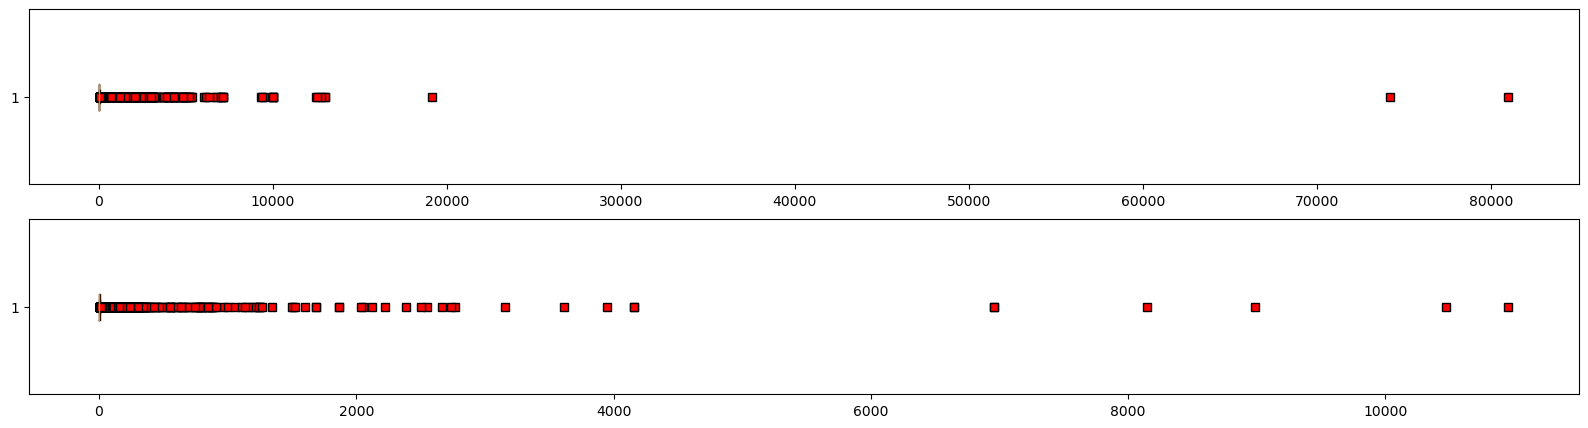

In [21]:
f, ax = plt.subplots(2,1, figsize = (20,5))
col_list = ["Quantity","Price"]
for i in range(0,2):
    ax[i].boxplot(df[col_list[i]],flierprops = dict(marker = "s", markerfacecolor = "red"), vert = 0)
plt.show()

In [22]:
replace_with_threshold(df, "Quantity")
replace_with_threshold(df, "Price")

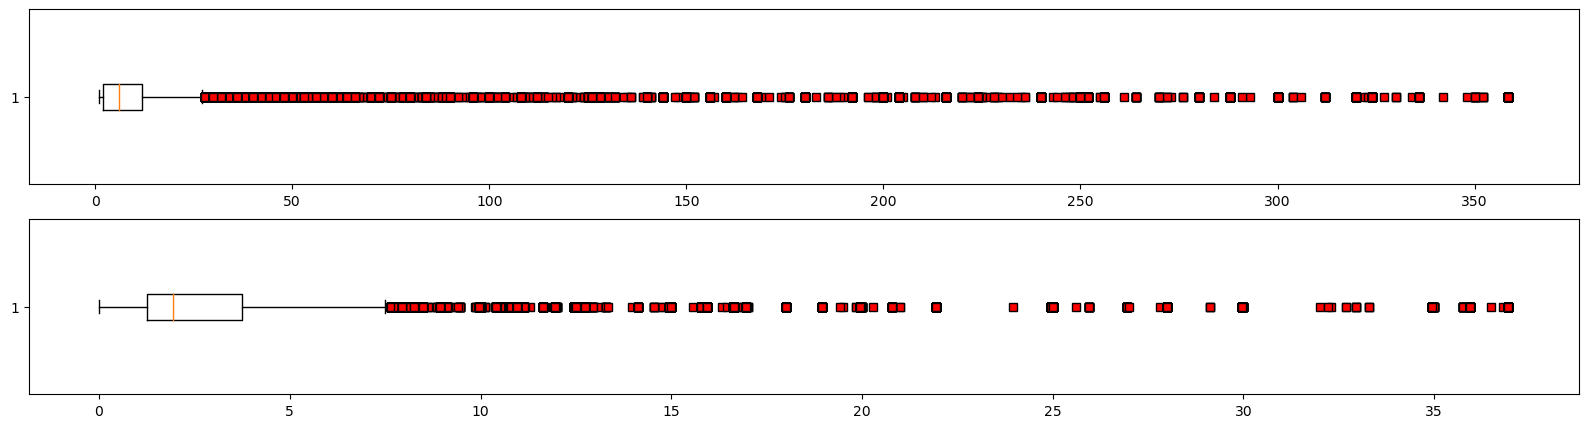

In [23]:
f, ax = plt.subplots(2,1, figsize = (20,5))
for i in range(0,2):
    ax[i].boxplot(df[col_list[i]],flierprops = dict(marker = "s", markerfacecolor = "red"), vert = 0)
plt.show()

# Exploring Datatset after processing

In [24]:
print(" SHAPE OF DATASET ".center(125,'-'))
print('Rows:{}'.format(df.shape[0]))
print('Columns:{}'.format(df.shape[1]))
df.shape

------------------------------------------------------ SHAPE OF DATASET -----------------------------------------------------
Rows:779495
Columns:8


(779495, 8)

In [25]:
print(" DATASET ".center(125,'-'))
df.head(10)

---------------------------------------------------------- DATASET ----------------------------------------------------------


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.000,2009-12-01 07:45:00,6.950,13085.000,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12.000,2009-12-01 07:45:00,6.750,13085.000,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12.000,2009-12-01 07:45:00,6.750,13085.000,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48.000,2009-12-01 07:45:00,2.100,13085.000,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24.000,2009-12-01 07:45:00,1.250,13085.000,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24.000,2009-12-01 07:45:00,1.650,13085.000,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24.000,2009-12-01 07:45:00,1.250,13085.000,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10.000,2009-12-01 07:45:00,5.950,13085.000,United Kingdom
8,489435,22350,CAT BOWL,12.000,2009-12-01 07:46:00,2.550,13085.000,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12.000,2009-12-01 07:46:00,3.750,13085.000,United Kingdom


In [26]:
print("DATA TYPES".center(125,'-'))
df.dtypes.value_counts()

----------------------------------------------------------DATA TYPES---------------------------------------------------------


object     5
float64    3
Name: count, dtype: int64

In [27]:
print(" MISSING VALUES ".center(125,'-'))
df.isnull().sum()[df.isnull().sum()>0].sort_values(ascending = False)

------------------------------------------------------- MISSING VALUES ------------------------------------------------------


Series([], dtype: int64)

In [28]:
print(" DUPLICATED VALUES ".center(125,'-'))
df.duplicated().sum()

----------------------------------------------------- DUPLICATED VALUES -----------------------------------------------------


10

In [29]:
print(" DATA INFO ".center(125,'-'))
df.info()

--------------------------------------------------------- DATA INFO ---------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 779495 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      779495 non-null  object 
 1   StockCode    779495 non-null  object 
 2   Description  779495 non-null  object 
 3   Quantity     779495 non-null  float64
 4   InvoiceDate  779495 non-null  object 
 5   Price        779495 non-null  float64
 6   Customer ID  779495 non-null  float64
 7   Country      779495 non-null  object 
dtypes: float64(3), object(5)
memory usage: 53.5+ MB


Data is clean now.